In [21]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from time import time
import scipy.stats as stats
#from sklearn.utils.fixes import loguniform

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 

In [25]:
from scipy.io import loadmat
mat = loadmat("Project Datasets/cancerWTrain.mat")

# X and y correspond to training set and validation set
X = np.transpose(mat["cancerTrainX"]) # 
y = np.transpose(mat["cancerTrainY"]) #
print("X shape:", X.shape)
print(X)
print(y)
print("y shape:", y.shape)
Xtest = np.transpose(mat["cancerTestX"]) # 
print("Xtest shape:", Xtest.shape)


X shape: (400, 30)
[[1.453e+01 1.398e+01 9.386e+01 ... 1.069e-01 2.606e-01 7.810e-02]
 [1.136e+01 1.757e+01 7.249e+01 ... 8.698e-02 2.973e-01 7.745e-02]
 [1.768e+01 2.074e+01 1.174e+02 ... 1.515e-01 2.463e-01 7.738e-02]
 ...
 [1.276e+01 1.337e+01 8.229e+01 ... 8.411e-02 2.564e-01 8.253e-02]
 [1.349e+01 2.230e+01 8.691e+01 ... 1.282e-01 2.871e-01 6.917e-02]
 [1.219e+01 1.329e+01 7.908e+01 ... 8.187e-02 3.469e-01 9.241e-02]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0

<IPython.core.display.Javascript object>


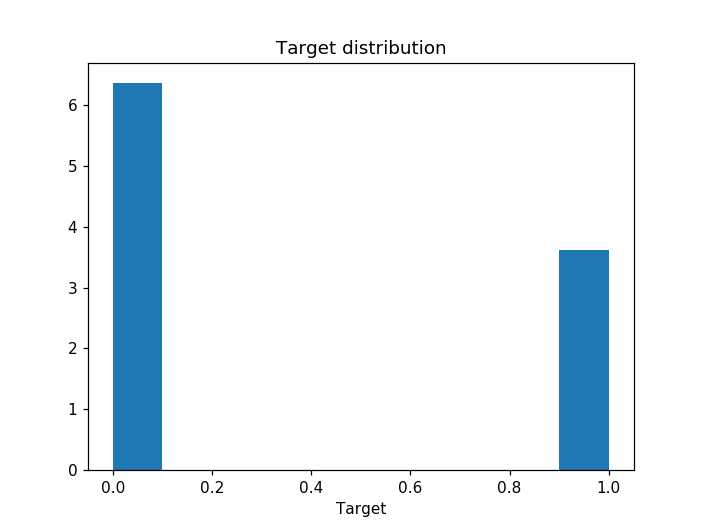

Text(0.5, 1.0, 'Target distribution')

In [13]:
import matplotlib
from distutils.version import LooseVersion

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

from sklearn.preprocessing import QuantileTransformer, quantile_transform
#y_trans = quantile_transform(y,n_quantiles=100,output_distribution='normal',copy=True).squeeze()

#f, (ax0, ax1) = plt.subplots(1, 2)
f, ax0 = plt.subplots()
ax0.hist(y, bins=10, **density_param)
ax0.set_ylabel('')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

In [23]:
#______________Normalize the Train data______________
mu = np.mean(X, axis=0)
std = np.std(X)
X_normalized = (X - mu) / std

#________________________Normalize the Test data________

Xtest_normalized = (Xtest - mu) / std


print(X_normalized)

[[ 1.74301464e-03 -2.31514955e-02  8.29308945e-03 ... -2.62629283e-05
  -1.28060981e-04 -2.34695378e-05]
 [-1.22112270e-02 -7.34842691e-03 -8.57769876e-02 ... -1.13950150e-04
   3.34912805e-05 -2.63308176e-05]
 [ 1.56092169e-02  6.60581474e-03  1.11915439e-01 ...  1.70064888e-04
  -1.91009137e-04 -2.66389555e-05]
 ...
 [-6.04847045e-03 -2.58366966e-02 -4.26376916e-02 ... -1.26583801e-04
  -1.46549251e-04 -3.96881523e-06]
 [-2.83503309e-03  1.34728863e-02 -2.23005949e-02 ...  6.74990109e-05
  -1.14088031e-05 -6.27791207e-05]
 [-8.55759276e-03 -2.61888541e-02 -5.67680120e-02 ... -1.36444212e-04
   2.51828942e-04  3.95226383e-05]]


Xall shape (569, 30)
(569, 29)


<IPython.core.display.Javascript object>


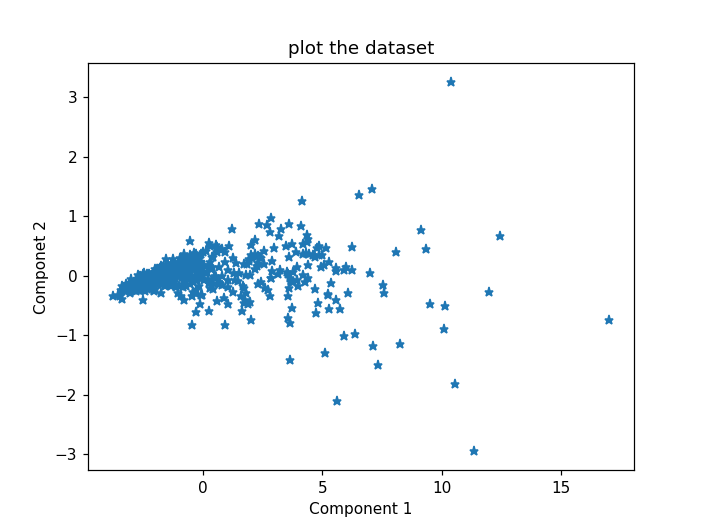

In [15]:
#before doing PCA combine train,validation & test input data
Xall = X_normalized ###
Xall = np.concatenate([Xall,Xtest_normalized], axis =0)
print("Xall shape", Xall.shape)

#____________________PCA__________________________

from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
XprincipalComponents= pca.fit_transform(Xall)
print(XprincipalComponents.shape)

#________________________Data Visualization____________________
fig, ax = plt.subplots()
ax.set_title("plot the dataset")
ax.set_xlabel("Component 1")
ax.set_ylabel("Componet 2")
ax.plot(XprincipalComponents[:,0], XprincipalComponents[:,1], '*')

In [20]:
#Split (traning , validation) and test dataset
Xte = XprincipalComponents[-Xtest.shape[0]:,:]
print("Xte shape", Xte.shape)
Xrem = XprincipalComponents[:-Xtest.shape[0],:]
print("Xrem shape", Xrem.shape)
print("Y size", y,shape)
#split traning and validation dataset
from sklearn.model_selection import train_test_split
Xtr,Xva,ytr,yva = train_test_split(Xrem,y, train_size = 0.8 , random_state =1)

print("Xtr.shape:{}, ytr.shape:{}, Xva.shape:{}, yva.shape:{}".format(Xtr.shape, ytr.shape, Xva.shape, yva.shape))




Xte shape (169, 29)
Xrem shape (400, 29)


NameError: name 'shape' is not defined

<IPython.core.display.Javascript object>


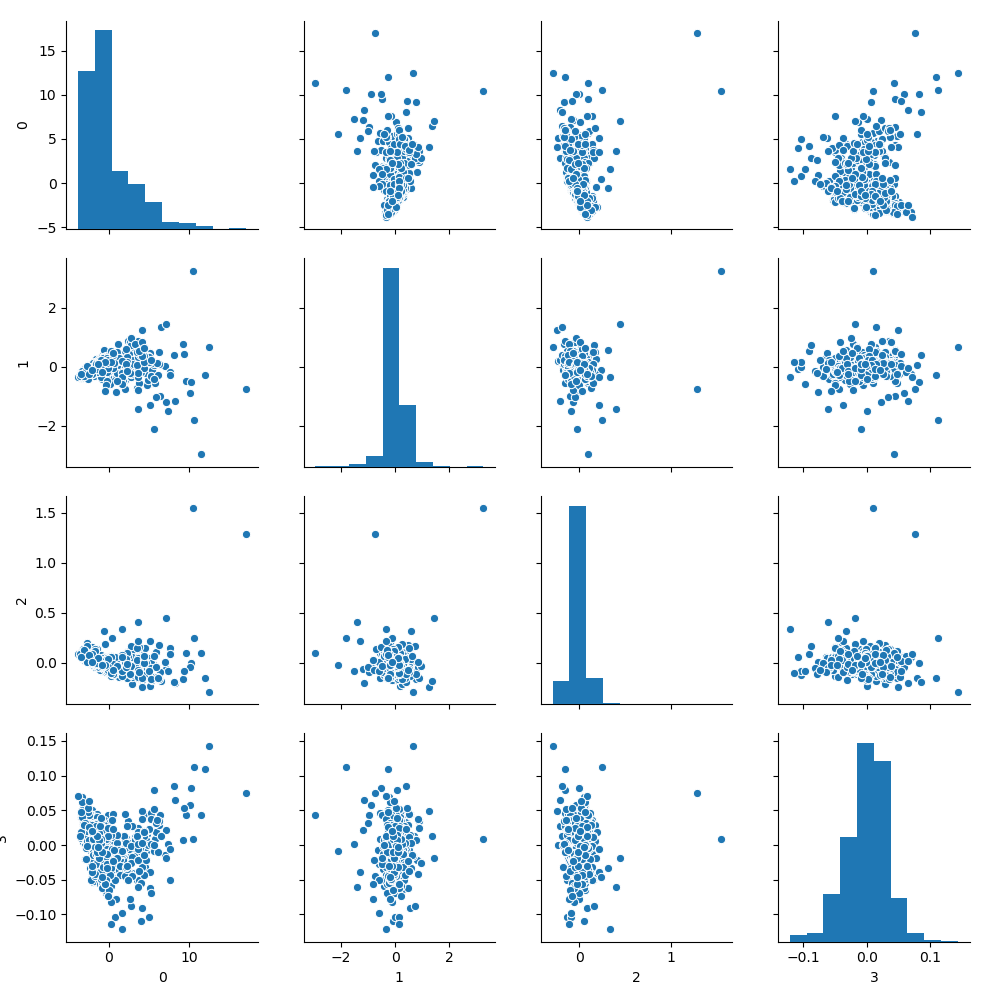

In [8]:
import pandas as pd
import seaborn as sns
Xdf = pd.DataFrame(XprincipalComponents[:,:4])
sns.pairplot(Xdf)

In [9]:
#_____________________________________Spliiting the data set into train and validation set___________________________

Xtrain = Xtr
ytrain = ytr
Xval = Xva
yval = yva



In [25]:
##SVM Classifier
print("Using SVM Classifier:\n")
svclf = SVC()
print(svclf.get_params())
svclf.fit(Xtrain, np.ravel(ytrain))

print('Predictions on validation data: \n')
print ('*******************************************\n')
PredictedOutcome = svclf.predict(Xval)
print(PredictedOutcome)
print ('\n*******************************************')

Number_of_Correct_Predictions = len([i for i, j in zip(PredictedOutcome, yval) if i == j])

print('Number of Correct Predictions:', Number_of_Correct_Predictions, 'out of', len(PredictedOutcome),
      'Number of Test Data')
print('Accuracy of Prediction in Percentage:', (Number_of_Correct_Predictions/float(len(PredictedOutcome)))*100, '%')

print("\n--------------------------------------------------------------\n")

scores = cross_val_score(svclf, Xrem, np.ravel(y), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Using SVM Classifier:

Predictions on validation data: 

*******************************************

[0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0]

*******************************************
Number of Correct Predictions: 76 out of 80 Number of Test Data
Accuracy of Prediction in Percentage: 95.0 %

--------------------------------------------------------------

[0.925  0.925  0.95   0.8625 0.875 ]
Accuracy: 0.91 (+/- 0.07)
[[49  1]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



In [40]:
#_________________Hyperparameter tuning using Grid Serach for SVM_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'kernel': ['linear'], 'C': np.arange(1,1000,1)}]
param_dist = {'C': np.arange(0.2, 2, 0.20), 'gamma': np.arange(0.001,0.01,0.001),'kernel': ['rbf', 'poly', 'sigmoid']}
clf= GridSearchCV(svclf, param_dist, cv=5)
start = time()
print("Best parameters set found on development set:")
clf.fit(Xtrain, np.ravel(ytrain))
print("GridSearchCV took %.2f seconds" % (time() - start))
print(clf.best_params_)


Best parameters set found on development set:
{'C': 1.4000000000000001, 'gamma': 0.009000000000000001, 'kernel': 'rbf'}


In [41]:
#__________________Cross validation for SVM_______________
from sklearn.model_selection import cross_val_score
svclf = SVC(kernel=clf.best_params_['kernel'], C=clf.best_params_['C'], gamma=clf.best_params_['gamma'])

scores = cross_val_score(svclf, Xrem, np.ravel(y), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

PredictedOutcome = clf.predict(Xval)
print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

[0.9    0.9125 0.9375 0.875  0.8625]
Accuracy: 0.90 (+/- 0.05)
[[50  0]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.83      0.91        30

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



In [46]:
##Decision Tree Classifier
print("Using Decision Tree Classifier:\n")
dtclf = DecisionTreeClassifier()
dtclf.fit(Xtrain, np.ravel(ytrain))

print('Predictions on validation data: \n')
print ('*******************************************\n')
PredictedOutcome = dtclf.predict(Xval)
print(PredictedOutcome)
print ('\n*******************************************')

Number_of_Correct_Predictions = len([i for i, j in zip(PredictedOutcome, yval) if i == j])

print('Number of Correct Predictions:', Number_of_Correct_Predictions, 'out of', len(PredictedOutcome),
      'Number of Test Data')
print('Accuracy of Prediction in Percentage:', (Number_of_Correct_Predictions/float(len(PredictedOutcome)))*100, '%')

print("\n--------------------------------------------------------------\n")



###
scores = cross_val_score(dtclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Using Decision Tree Classifier:

Predictions on validation data: 

*******************************************

[0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 0 0]

*******************************************
Number of Correct Predictions: 78 out of 80 Number of Test Data
Accuracy of Prediction in Percentage: 97.5 %

--------------------------------------------------------------

[0.82642573 0.85732759 0.77659151 0.78944661 0.81970443]
Accuracy: 0.81 (+/- 0.03)
[[50  0]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [57]:
#_________________Hyperparameter tuning using Grid Serach for Decision Tree_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'max_depth': np.arange(1,50)}]
param_dist = {'max_depth':np.arange(5,100,5)#, 'min_samples_split': np.arange(0.1, 1.0, 0.10), 'min_samples_leaf': np.arange(0.1, 0.5, 0.1)
              , 'criterion':['gini', 'entropy'], 'ccp_alpha':[0, 0.01, 0.03, 0.05]}
clf= GridSearchCV(dtclf, param_dist, cv=5)
start = time()
print("Best parameters set found on development set:")
clf.fit(Xtrain, np.ravel(ytrain))
print("GridSearchCV took %.2f seconds" % (time() - start))
print(clf.best_params_)


#__________________Cross validation for Decision Tree_______________
from sklearn.model_selection import cross_val_score
dtclf = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'])
scores = cross_val_score(dtclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

PredictedOutcome = clf.predict(Xval)
print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Best parameters set found on development set:
{'ccp_alpha': 0.05, 'criterion': 'entropy', 'max_depth': 5}
[0.85698276 0.90625    0.84351213 0.7589491  0.91598143]
Accuracy: 0.86 (+/- 0.06)
[[45  5]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           1       0.86      1.00      0.92        30

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



In [59]:
##MLPClassifier
print("Using MLP Classifier:\n")
mlpclf = MLPClassifier(alpha=1, max_iter=2000, early_stopping = True)
print(mlpclf.get_params())
mlpclf.fit(Xtrain, np.ravel(ytrain))

print('Predictions on validation data: \n')
print ('*******************************************\n')
PredictedOutcome = mlpclf.predict(Xval)
print(PredictedOutcome)
print ('\n*******************************************')

Number_of_Correct_Predictions = len([i for i, j in zip(PredictedOutcome, yval) if i == j])

print('Number of Correct Predictions:', Number_of_Correct_Predictions, 'out of', len(PredictedOutcome),
      'Number of Test Data')
print('Accuracy of Prediction in Percentage:', (Number_of_Correct_Predictions/float(len(PredictedOutcome)))*100, '%')

print("\n--------------------------------------------------------------\n")


###
scores = cross_val_score(mlpclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Using MLP Classifier:

{'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Predictions on validation data: 

*******************************************

[0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 1 0 1 0]

*******************************************
Number of Correct Predictions: 70 out of 80 Number of Test Data
Accuracy of Prediction in Percentage: 87.5 %

--------------------------------------------------------------

[0.95312954 0.89917128 0.96122103 0.

In [61]:
#_________________Hyperparameter tuning using Grid Serach for MLP_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'alpha': np.arange(0.01,5,1), 'max_iter':[1000,2000] }]
param_dist = {'verbose':[True], 'early_stopping':[True],'alpha':np.arange(0.0002,0.001,0.0002), 'hidden_layer_sizes':[(30,30,30),(50,50,50),(70,70,70)], 'learning_rate':['invscaling', 'adaptive'], 'learning_rate_init':[0.001,0.01,0.1],'max_iter':np.arange(1000,2000,1000)}
clf= GridSearchCV(mlpclf, param_dist, cv=5)
start = time()
print("Best parameters set found on development set:")
clf.fit(Xtrain, np.ravel(ytrain))
print("GridSearchCV took %.2f seconds" % (time() - start))
print(clf.best_params_)


#__________________Cross validation for MLP_______________
from sklearn.model_selection import cross_val_score
mlpclf = MLPClassifier(alpha=clf.best_params_['alpha'], max_iter=clf.best_params_['max_iter'])
scores = cross_val_score(mlpclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

PredictedOutcome = clf.predict(Xval)
print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Best parameters set found on development set:
Iteration 1, loss = 0.67857505
Validation score: 0.653846
Iteration 2, loss = 0.66013358
Validation score: 0.653846
Iteration 3, loss = 0.64250643
Validation score: 0.653846
Iteration 4, loss = 0.62552473
Validation score: 0.653846
Iteration 5, loss = 0.60932141
Validation score: 0.653846
Iteration 6, loss = 0.59208364
Validation score: 0.653846
Iteration 7, loss = 0.57551499
Validation score: 0.692308
Iteration 8, loss = 0.55856105
Validation score: 0.769231
Iteration 9, loss = 0.54156368
Validation score: 0.807692
Iteration 10, loss = 0.52483496
Validation score: 0.846154
Iteration 11, loss = 0.50840819
Validation score: 0.884615
Iteration 12, loss = 0.49224433
Validation score: 0.923077
Iteration 13, loss = 0.47646020
Validation score: 0.923077
Iteration 14, loss = 0.46106863
Validation score: 0.923077
Iteration 15, loss = 0.44618778
Validation score: 0.923077
Iteration 16, loss = 0.43258829
Validation score: 0.923077
Iteration 17, loss 

Iteration 8, loss = 0.23996642
Validation score: 0.884615
Iteration 9, loss = 0.23617890
Validation score: 0.884615
Iteration 10, loss = 0.23176399
Validation score: 0.884615
Iteration 11, loss = 0.22735170
Validation score: 0.884615
Iteration 12, loss = 0.22138354
Validation score: 0.884615
Iteration 13, loss = 0.21445115
Validation score: 0.884615
Iteration 14, loss = 0.20885304
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78657634
Validation score: 0.769231
Iteration 2, loss = 0.55844104
Validation score: 0.769231
Iteration 3, loss = 0.41543024
Validation score: 0.807692
Iteration 4, loss = 0.31550216
Validation score: 0.807692
Iteration 5, loss = 0.24928592
Validation score: 0.807692
Iteration 6, loss = 0.22541223
Validation score: 0.807692
Iteration 7, loss = 0.22484427
Validation score: 0.807692
Iteration 8, loss = 0.21836642
Validation score: 0.769231
Iteration 9, loss = 0.20472962
V

Validation score: 0.653846
Iteration 4, loss = 0.63870826
Validation score: 0.653846
Iteration 5, loss = 0.61718077
Validation score: 0.653846
Iteration 6, loss = 0.59725001
Validation score: 0.769231
Iteration 7, loss = 0.57821717
Validation score: 0.846154
Iteration 8, loss = 0.56009008
Validation score: 0.846154
Iteration 9, loss = 0.54240487
Validation score: 0.923077
Iteration 10, loss = 0.52539320
Validation score: 0.923077
Iteration 11, loss = 0.50838957
Validation score: 0.923077
Iteration 12, loss = 0.49222979
Validation score: 0.923077
Iteration 13, loss = 0.47635762
Validation score: 0.923077
Iteration 14, loss = 0.46083806
Validation score: 0.923077
Iteration 15, loss = 0.44554199
Validation score: 0.923077
Iteration 16, loss = 0.43122402
Validation score: 0.923077
Iteration 17, loss = 0.41692778
Validation score: 0.923077
Iteration 18, loss = 0.40305186
Validation score: 0.923077
Iteration 19, loss = 0.39018433
Validation score: 0.923077
Iteration 20, loss = 0.37688789
Val

Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68782095
Validation score: 0.692308
Iteration 2, loss = 0.47583965
Validation score: 0.769231
Iteration 3, loss = 0.36862577
Validation score: 0.846154
Iteration 4, loss = 0.30141510
Validation score: 0.846154
Iteration 5, loss = 0.25621660
Validation score: 0.923077
Iteration 6, loss = 0.22806877
Validation score: 0.923077
Iteration 7, loss = 0.23597894
Validation score: 0.884615
Iteration 8, loss = 0.24920907
Validation score: 0.923077
Iteration 9, loss = 0.22666224
Validation score: 0.884615
Iteration 10, loss = 0.20943187
Validation score: 0.923077
Iteration 11, loss = 0.21612562
Validation score: 0.884615
Iteration 12, loss = 0.21835624
Validation score: 0.884615
Iteration 13, loss = 0.20835030
Validation score: 0.923077
Iteration 14, loss = 0.19747928
Validation score: 0.923077
Iteration 15, loss = 0.19795915
Validation score: 0.961538
Iteration 16, loss = 0.19887622

Iteration 9, loss = 0.14660596
Validation score: 0.961538
Iteration 10, loss = 0.16792781
Validation score: 0.961538
Iteration 11, loss = 0.15370422
Validation score: 0.961538
Iteration 12, loss = 0.16248813
Validation score: 0.961538
Iteration 13, loss = 0.17559834
Validation score: 0.961538
Iteration 14, loss = 0.14536685
Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65293421
Validation score: 0.807692
Iteration 2, loss = 0.39386547
Validation score: 0.884615
Iteration 3, loss = 0.31394666
Validation score: 0.923077
Iteration 4, loss = 0.28153621
Validation score: 0.884615
Iteration 5, loss = 0.20964807
Validation score: 0.884615
Iteration 6, loss = 0.19317197
Validation score: 0.961538
Iteration 7, loss = 0.18312718
Validation score: 1.000000
Iteration 8, loss = 0.16936945
Validation score: 1.000000
Iteration 9, loss = 0.16053932
Validation score: 1.000000
Iteration 10, loss = 0.14957433


Iteration 11, loss = 0.20894950
Validation score: 0.923077
Iteration 12, loss = 0.20379766
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63855000
Validation score: 0.807692
Iteration 2, loss = 0.36791280
Validation score: 0.807692
Iteration 3, loss = 0.26449159
Validation score: 0.846154
Iteration 4, loss = 0.24885377
Validation score: 0.846154
Iteration 5, loss = 0.24425769
Validation score: 0.884615
Iteration 6, loss = 0.23814643
Validation score: 0.884615
Iteration 7, loss = 0.25166913
Validation score: 0.884615
Iteration 8, loss = 0.24619314
Validation score: 0.884615
Iteration 9, loss = 0.22172221
Validation score: 0.884615
Iteration 10, loss = 0.20690312
Validation score: 0.807692
Iteration 11, loss = 0.19912322
Validation score: 0.846154
Iteration 12, loss = 0.18890655
Validation score: 0.846154
Iteration 13, loss = 0.18822068
Validation score: 0.884615
Iteration 14, loss = 0.18527377

Iteration 6, loss = 0.50549042
Validation score: 0.692308
Iteration 7, loss = 0.47839705
Validation score: 0.769231
Iteration 8, loss = 0.45440802
Validation score: 0.769231
Iteration 9, loss = 0.43164091
Validation score: 0.807692
Iteration 10, loss = 0.41073461
Validation score: 0.846154
Iteration 11, loss = 0.39134656
Validation score: 0.846154
Iteration 12, loss = 0.37365004
Validation score: 0.846154
Iteration 13, loss = 0.35709455
Validation score: 0.846154
Iteration 14, loss = 0.34176049
Validation score: 0.884615
Iteration 15, loss = 0.32827785
Validation score: 0.884615
Iteration 16, loss = 0.31613225
Validation score: 0.884615
Iteration 17, loss = 0.30426011
Validation score: 0.884615
Iteration 18, loss = 0.29462080
Validation score: 0.884615
Iteration 19, loss = 0.28502088
Validation score: 0.884615
Iteration 20, loss = 0.27602857
Validation score: 0.884615
Iteration 21, loss = 0.26790491
Validation score: 0.884615
Iteration 22, loss = 0.26065653
Validation score: 0.884615
I

Iteration 20, loss = 0.18862846
Validation score: 1.000000
Iteration 21, loss = 0.20262914
Validation score: 1.000000
Iteration 22, loss = 0.19617724
Validation score: 0.961538
Iteration 23, loss = 0.18400651
Validation score: 0.961538
Iteration 24, loss = 0.17816603
Validation score: 1.000000
Iteration 25, loss = 0.17681910
Validation score: 1.000000
Iteration 26, loss = 0.17854380
Validation score: 1.000000
Iteration 27, loss = 0.17656101
Validation score: 0.961538
Iteration 28, loss = 0.18828493
Validation score: 0.961538
Iteration 29, loss = 0.18628553
Validation score: 0.961538
Iteration 30, loss = 0.17046611
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70784781
Validation score: 0.884615
Iteration 2, loss = 0.40637599
Validation score: 0.884615
Iteration 3, loss = 0.27193753
Validation score: 0.884615
Iteration 4, loss = 0.24321598
Validation score: 0.884615
Iteration 5, loss = 0.2405

Validation score: 0.961538
Iteration 6, loss = 0.41117302
Validation score: 0.961538
Iteration 7, loss = 0.38145096
Validation score: 0.961538
Iteration 8, loss = 0.35570325
Validation score: 1.000000
Iteration 9, loss = 0.33414527
Validation score: 1.000000
Iteration 10, loss = 0.31573600
Validation score: 1.000000
Iteration 11, loss = 0.29980194
Validation score: 1.000000
Iteration 12, loss = 0.28643004
Validation score: 1.000000
Iteration 13, loss = 0.27587489
Validation score: 1.000000
Iteration 14, loss = 0.26687590
Validation score: 1.000000
Iteration 15, loss = 0.25997570
Validation score: 1.000000
Iteration 16, loss = 0.25385238
Validation score: 1.000000
Iteration 17, loss = 0.24950484
Validation score: 1.000000
Iteration 18, loss = 0.24556573
Validation score: 1.000000
Iteration 19, loss = 0.24312986
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65323173
Validation score: 0.730769


Validation score: 0.923077
Iteration 17, loss = 0.16704292
Validation score: 0.923077
Iteration 18, loss = 0.15815693
Validation score: 0.846154
Iteration 19, loss = 0.15752118
Validation score: 0.846154
Iteration 20, loss = 0.18130580
Validation score: 0.884615
Iteration 21, loss = 0.15024717
Validation score: 0.923077
Iteration 22, loss = 0.15779695
Validation score: 0.923077
Iteration 23, loss = 0.15718237
Validation score: 0.923077
Iteration 24, loss = 0.14492848
Validation score: 0.884615
Iteration 25, loss = 0.15518629
Validation score: 0.884615
Iteration 26, loss = 0.13927231
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65754448
Validation score: 0.884615
Iteration 2, loss = 0.34511401
Validation score: 0.923077
Iteration 3, loss = 0.25486649
Validation score: 0.923077
Iteration 4, loss = 0.26328342
Validation score: 0.923077
Iteration 5, loss = 0.23853759
Validation score: 0.884615


Iteration 26, loss = 0.14299266
Validation score: 1.000000
Iteration 27, loss = 0.20454204
Validation score: 1.000000
Iteration 28, loss = 0.16412014
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69799210
Validation score: 0.884615
Iteration 2, loss = 0.63481228
Validation score: 0.884615
Iteration 3, loss = 0.58100090
Validation score: 0.884615
Iteration 4, loss = 0.53754914
Validation score: 0.846154
Iteration 5, loss = 0.49898837
Validation score: 0.846154
Iteration 6, loss = 0.46453938
Validation score: 0.846154
Iteration 7, loss = 0.43232308
Validation score: 0.884615
Iteration 8, loss = 0.40353380
Validation score: 0.884615
Iteration 9, loss = 0.37669747
Validation score: 0.884615
Iteration 10, loss = 0.35280247
Validation score: 0.884615
Iteration 11, loss = 0.33116438
Validation score: 0.884615
Iteration 12, loss = 0.31221756
Validation score: 0.884615
Validation score did not improv

Iteration 7, loss = 0.21205058
Validation score: 0.923077
Iteration 8, loss = 0.18059611
Validation score: 0.884615
Iteration 9, loss = 0.17591131
Validation score: 0.884615
Iteration 10, loss = 0.17212784
Validation score: 0.884615
Iteration 11, loss = 0.17437714
Validation score: 0.884615
Iteration 12, loss = 0.16139078
Validation score: 0.884615
Iteration 13, loss = 0.15741939
Validation score: 0.884615
Iteration 14, loss = 0.15524710
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72511411
Validation score: 0.961538
Iteration 2, loss = 0.38068915
Validation score: 0.961538
Iteration 3, loss = 0.28866640
Validation score: 0.961538
Iteration 4, loss = 0.28822203
Validation score: 0.961538
Iteration 5, loss = 0.28271330
Validation score: 0.961538
Iteration 6, loss = 0.26655558
Validation score: 1.000000
Iteration 7, loss = 0.26034523
Validation score: 0.961538
Iteration 8, loss = 0.25547586
V

Iteration 19, loss = 0.38530639
Validation score: 0.923077
Iteration 20, loss = 0.37354630
Validation score: 0.884615
Iteration 21, loss = 0.36247769
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59972160
Validation score: 0.769231
Iteration 2, loss = 0.58721312
Validation score: 0.807692
Iteration 3, loss = 0.57543111
Validation score: 0.807692
Iteration 4, loss = 0.56405421
Validation score: 0.807692
Iteration 5, loss = 0.55256538
Validation score: 0.846154
Iteration 6, loss = 0.54104302
Validation score: 0.884615
Iteration 7, loss = 0.52953216
Validation score: 0.884615
Iteration 8, loss = 0.51801407
Validation score: 0.884615
Iteration 9, loss = 0.50617530
Validation score: 0.884615
Iteration 10, loss = 0.49456455
Validation score: 0.884615
Iteration 11, loss = 0.48286583
Validation score: 0.884615
Iteration 12, loss = 0.47077003
Validation score: 0.884615
Iteration 13, loss = 0.45905236

Iteration 1, loss = 0.69139480
Validation score: 0.884615
Iteration 2, loss = 0.23198749
Validation score: 0.846154
Iteration 3, loss = 0.47217817
Validation score: 0.884615
Iteration 4, loss = 0.30504887
Validation score: 0.923077
Iteration 5, loss = 0.25271067
Validation score: 0.923077
Iteration 6, loss = 0.22814575
Validation score: 0.923077
Iteration 7, loss = 0.17738157
Validation score: 0.923077
Iteration 8, loss = 0.16625573
Validation score: 0.961538
Iteration 9, loss = 0.15704921
Validation score: 0.923077
Iteration 10, loss = 0.13969880
Validation score: 0.923077
Iteration 11, loss = 0.14227457
Validation score: 0.923077
Iteration 12, loss = 0.13116246
Validation score: 0.923077
Iteration 13, loss = 0.12891454
Validation score: 0.961538
Iteration 14, loss = 0.12855911
Validation score: 0.961538
Iteration 15, loss = 0.13097723
Validation score: 0.961538
Iteration 16, loss = 0.13472402
Validation score: 0.961538
Iteration 17, loss = 0.11342862
Validation score: 0.961538
Iterat

Validation score: 0.884615
Iteration 22, loss = 0.41982074
Validation score: 0.884615
Iteration 23, loss = 0.40568936
Validation score: 0.884615
Iteration 24, loss = 0.39199817
Validation score: 0.884615
Iteration 25, loss = 0.37846269
Validation score: 0.884615
Iteration 26, loss = 0.36621073
Validation score: 0.923077
Iteration 27, loss = 0.35380802
Validation score: 0.923077
Iteration 28, loss = 0.34273809
Validation score: 0.961538
Iteration 29, loss = 0.33162637
Validation score: 0.961538
Iteration 30, loss = 0.32153622
Validation score: 0.961538
Iteration 31, loss = 0.31219330
Validation score: 0.961538
Iteration 32, loss = 0.30328856
Validation score: 0.961538
Iteration 33, loss = 0.29534458
Validation score: 0.961538
Iteration 34, loss = 0.28753743
Validation score: 0.961538
Iteration 35, loss = 0.28015738
Validation score: 0.961538
Iteration 36, loss = 0.27357161
Validation score: 0.961538
Iteration 37, loss = 0.26678217
Validation score: 0.961538
Iteration 38, loss = 0.260874

Iteration 7, loss = 0.24007706
Validation score: 0.884615
Iteration 8, loss = 0.24039361
Validation score: 0.923077
Iteration 9, loss = 0.23993006
Validation score: 0.923077
Iteration 10, loss = 0.22340913
Validation score: 0.884615
Iteration 11, loss = 0.21814351
Validation score: 0.884615
Iteration 12, loss = 0.22132210
Validation score: 0.923077
Iteration 13, loss = 0.20610111
Validation score: 0.923077
Iteration 14, loss = 0.19631403
Validation score: 0.923077
Iteration 15, loss = 0.21587503
Validation score: 0.923077
Iteration 16, loss = 0.20808835
Validation score: 0.923077
Iteration 17, loss = 0.18360432
Validation score: 0.923077
Iteration 18, loss = 0.17972394
Validation score: 0.923077
Iteration 19, loss = 0.17301612
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67045551
Validation score: 0.807692
Iteration 2, loss = 0.44770250
Validation score: 0.846154
Iteration 3, loss = 0.46938

Iteration 1, loss = 0.62762599
Validation score: 0.923077
Iteration 2, loss = 0.58804926
Validation score: 1.000000
Iteration 3, loss = 0.55365701
Validation score: 0.961538
Iteration 4, loss = 0.52275469
Validation score: 0.961538
Iteration 5, loss = 0.49415247
Validation score: 0.961538
Iteration 6, loss = 0.46786955
Validation score: 0.961538
Iteration 7, loss = 0.44296997
Validation score: 0.961538
Iteration 8, loss = 0.42027061
Validation score: 0.961538
Iteration 9, loss = 0.39986753
Validation score: 0.961538
Iteration 10, loss = 0.38104039
Validation score: 0.961538
Iteration 11, loss = 0.36382815
Validation score: 0.961538
Iteration 12, loss = 0.34901864
Validation score: 0.961538
Iteration 13, loss = 0.33570003
Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69855692
Validation score: 0.346154
Iteration 2, loss = 0.66601526
Validation score: 0.576923
Iteration 3, loss = 0.63704766
Va

Iteration 2, loss = 1.73996419
Validation score: 0.846154
Iteration 3, loss = 0.44170080
Validation score: 0.884615
Iteration 4, loss = 0.28627304
Validation score: 0.884615
Iteration 5, loss = 0.24709362
Validation score: 0.884615
Iteration 6, loss = 0.23004993
Validation score: 0.961538
Iteration 7, loss = 0.22114145
Validation score: 0.846154
Iteration 8, loss = 0.18775356
Validation score: 0.846154
Iteration 9, loss = 0.19597003
Validation score: 0.846154
Iteration 10, loss = 0.18174463
Validation score: 0.884615
Iteration 11, loss = 0.16972482
Validation score: 0.923077
Iteration 12, loss = 0.16737130
Validation score: 0.884615
Iteration 13, loss = 0.15966198
Validation score: 0.923077
Iteration 14, loss = 0.14455648
Validation score: 0.923077
Iteration 15, loss = 0.15624124
Validation score: 0.923077
Iteration 16, loss = 0.15199790
Validation score: 1.000000
Iteration 17, loss = 0.16165961
Validation score: 1.000000
Iteration 18, loss = 0.13823458
Validation score: 0.961538
Itera

Iteration 8, loss = 0.46263009
Validation score: 0.807692
Iteration 9, loss = 0.43751611
Validation score: 0.807692
Iteration 10, loss = 0.41380272
Validation score: 0.807692
Iteration 11, loss = 0.39102609
Validation score: 0.807692
Iteration 12, loss = 0.37001362
Validation score: 0.807692
Iteration 13, loss = 0.35055464
Validation score: 0.807692
Iteration 14, loss = 0.33202763
Validation score: 0.807692
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66380510
Validation score: 0.653846
Iteration 2, loss = 0.61444752
Validation score: 0.769231
Iteration 3, loss = 0.57471794
Validation score: 0.769231
Iteration 4, loss = 0.53945108
Validation score: 0.769231
Iteration 5, loss = 0.50708045
Validation score: 0.807692
Iteration 6, loss = 0.47733510
Validation score: 0.807692
Iteration 7, loss = 0.44990290
Validation score: 0.807692
Iteration 8, loss = 0.42386856
Validation score: 0.807692
Iteration 9, loss = 0.39969877
V

Validation score: 0.923077
Iteration 22, loss = 0.16487944
Validation score: 0.923077
Iteration 23, loss = 0.10259175
Validation score: 0.961538
Iteration 24, loss = 0.13650281
Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63467155
Validation score: 1.000000
Iteration 2, loss = 0.66829140
Validation score: 0.961538
Iteration 3, loss = 0.30339973
Validation score: 1.000000
Iteration 4, loss = 0.31074330
Validation score: 1.000000
Iteration 5, loss = 0.22335443
Validation score: 1.000000
Iteration 6, loss = 0.18703466
Validation score: 1.000000
Iteration 7, loss = 0.19201449
Validation score: 0.961538
Iteration 8, loss = 0.15774190
Validation score: 1.000000
Iteration 9, loss = 0.16764041
Validation score: 1.000000
Iteration 10, loss = 0.13816671
Validation score: 1.000000
Iteration 11, loss = 0.16002737
Validation score: 1.000000
Iteration 12, loss = 0.16168951
Validation score: 1.000000
Vali

Iteration 5, loss = 0.53303966
Validation score: 0.846154
Iteration 6, loss = 0.50270047
Validation score: 0.846154
Iteration 7, loss = 0.47312890
Validation score: 0.846154
Iteration 8, loss = 0.44519567
Validation score: 0.846154
Iteration 9, loss = 0.41883649
Validation score: 0.884615
Iteration 10, loss = 0.39339936
Validation score: 0.884615
Iteration 11, loss = 0.37051396
Validation score: 0.884615
Iteration 12, loss = 0.34934719
Validation score: 0.884615
Iteration 13, loss = 0.33078137
Validation score: 0.884615
Iteration 14, loss = 0.31420482
Validation score: 0.846154
Iteration 15, loss = 0.30024757
Validation score: 0.846154
Iteration 16, loss = 0.28954624
Validation score: 0.846154
Iteration 17, loss = 0.27986603
Validation score: 0.846154
Iteration 18, loss = 0.27270173
Validation score: 0.846154
Iteration 19, loss = 0.26695117
Validation score: 0.846154
Iteration 20, loss = 0.26239763
Validation score: 0.807692
Validation score did not improve more than tol=0.000100 for 1

Iteration 15, loss = 0.14446884
Validation score: 0.884615
Iteration 16, loss = 0.14975846
Validation score: 0.923077
Iteration 17, loss = 0.13163297
Validation score: 0.923077
Iteration 18, loss = 0.13575628
Validation score: 0.923077
Iteration 19, loss = 0.12355245
Validation score: 0.923077
Iteration 20, loss = 0.11071250
Validation score: 0.961538
Iteration 21, loss = 0.12442723
Validation score: 0.961538
Iteration 22, loss = 0.11515446
Validation score: 0.961538
Iteration 23, loss = 0.11625650
Validation score: 0.961538
Iteration 24, loss = 0.10885484
Validation score: 0.923077
Iteration 25, loss = 0.10121308
Validation score: 0.923077
Iteration 26, loss = 0.10316249
Validation score: 0.961538
Iteration 27, loss = 0.09225874
Validation score: 0.923077
Iteration 28, loss = 0.17182708
Validation score: 0.923077
Iteration 29, loss = 0.09042965
Validation score: 0.923077
Iteration 30, loss = 0.21179165
Validation score: 0.923077
Iteration 31, loss = 0.21688594
Validation score: 0.9230

Validation score: 0.961538
Iteration 7, loss = 0.24154812
Validation score: 0.961538
Iteration 8, loss = 0.23748819
Validation score: 0.961538
Iteration 9, loss = 0.22316208
Validation score: 0.961538
Iteration 10, loss = 0.19364360
Validation score: 0.961538
Iteration 11, loss = 0.19379179
Validation score: 0.961538
Iteration 12, loss = 0.20251205
Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75361962
Validation score: 0.884615
Iteration 2, loss = 0.47365955
Validation score: 0.884615
Iteration 3, loss = 0.30377955
Validation score: 0.884615
Iteration 4, loss = 0.24438161
Validation score: 0.884615
Iteration 5, loss = 0.25194540
Validation score: 0.961538
Iteration 6, loss = 0.26149471
Validation score: 0.961538
Iteration 7, loss = 0.25831070
Validation score: 0.961538
Iteration 8, loss = 0.22646472
Validation score: 0.884615
Iteration 9, loss = 0.22300374
Validation score: 0.884615
Iterati

Iteration 5, loss = 0.33158068
Validation score: 0.807692
Iteration 6, loss = 0.27622564
Validation score: 0.807692
Iteration 7, loss = 0.34885984
Validation score: 0.769231
Iteration 8, loss = 0.34642107
Validation score: 0.807692
Iteration 9, loss = 0.22529531
Validation score: 0.730769
Iteration 10, loss = 1.81707494
Validation score: 0.846154
Iteration 11, loss = 0.19365784
Validation score: 0.807692
Iteration 12, loss = 0.22712727
Validation score: 0.807692
Iteration 13, loss = 0.24395263
Validation score: 0.769231
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78368122
Validation score: 0.653846
Iteration 2, loss = 0.73827537
Validation score: 0.653846
Iteration 3, loss = 0.69905145
Validation score: 0.653846
Iteration 4, loss = 0.66348192
Validation score: 0.653846
Iteration 5, loss = 0.63087862
Validation score: 0.653846
Iteration 6, loss = 0.60078242
Validation score: 0.653846
Iteration 7, loss = 0.57383975
Va

Iteration 12, loss = 0.21976291
Validation score: 0.884615
Iteration 13, loss = 0.20785298
Validation score: 0.923077
Iteration 14, loss = 0.19675581
Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63600907
Validation score: 0.846154
Iteration 2, loss = 0.49431940
Validation score: 0.961538
Iteration 3, loss = 0.38620884
Validation score: 0.923077
Iteration 4, loss = 0.31413255
Validation score: 0.923077
Iteration 5, loss = 0.27342951
Validation score: 0.923077
Iteration 6, loss = 0.25905810
Validation score: 0.923077
Iteration 7, loss = 0.25635471
Validation score: 0.923077
Iteration 8, loss = 0.25543275
Validation score: 0.923077
Iteration 9, loss = 0.25054006
Validation score: 0.923077
Iteration 10, loss = 0.23741782
Validation score: 0.923077
Iteration 11, loss = 0.22151246
Validation score: 0.923077
Iteration 12, loss = 0.20682378
Validation score: 0.923077
Iteration 13, loss = 0.19237482

Iteration 7, loss = 0.62723753
Validation score: 0.923077
Iteration 8, loss = 0.61292392
Validation score: 0.923077
Iteration 9, loss = 0.59843969
Validation score: 0.923077
Iteration 10, loss = 0.58306287
Validation score: 0.923077
Iteration 11, loss = 0.56611580
Validation score: 0.923077
Iteration 12, loss = 0.54822255
Validation score: 0.923077
Iteration 13, loss = 0.52981402
Validation score: 0.923077
Iteration 14, loss = 0.51117951
Validation score: 0.923077
Iteration 15, loss = 0.49290229
Validation score: 0.923077
Iteration 16, loss = 0.47496817
Validation score: 0.923077
Iteration 17, loss = 0.45721554
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70056053
Validation score: 0.653846
Iteration 2, loss = 0.67444561
Validation score: 0.730769
Iteration 3, loss = 0.65003229
Validation score: 0.769231
Iteration 4, loss = 0.62755948
Validation score: 0.807692
Iteration 5, loss = 0.6054702

Iteration 7, loss = 0.29361627
Validation score: 0.923077
Iteration 8, loss = 0.28837895
Validation score: 0.923077
Iteration 9, loss = 0.28147032
Validation score: 0.923077
Iteration 10, loss = 0.27044744
Validation score: 0.884615
Iteration 11, loss = 0.25520446
Validation score: 0.923077
Iteration 12, loss = 0.24187060
Validation score: 0.884615
Iteration 13, loss = 0.22968034
Validation score: 0.884615
Iteration 14, loss = 0.22235404
Validation score: 0.884615
Iteration 15, loss = 0.22066184
Validation score: 0.884615
Iteration 16, loss = 0.21616027
Validation score: 0.884615
Iteration 17, loss = 0.20631024
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74801131
Validation score: 0.846154
Iteration 2, loss = 0.28915421
Validation score: 0.923077
Iteration 3, loss = 0.43161277
Validation score: 0.884615
Iteration 4, loss = 0.24782049
Validation score: 0.846154
Iteration 5, loss = 0.2785934

Iteration 5, loss = 0.53629171
Validation score: 0.769231
Iteration 6, loss = 0.50266571
Validation score: 0.807692
Iteration 7, loss = 0.47262269
Validation score: 0.807692
Iteration 8, loss = 0.44686787
Validation score: 0.846154
Iteration 9, loss = 0.42236189
Validation score: 0.884615
Iteration 10, loss = 0.40096237
Validation score: 0.884615
Iteration 11, loss = 0.38043091
Validation score: 0.884615
Iteration 12, loss = 0.36179495
Validation score: 0.846154
Iteration 13, loss = 0.34485591
Validation score: 0.846154
Iteration 14, loss = 0.32892699
Validation score: 0.846154
Iteration 15, loss = 0.31529718
Validation score: 0.846154
Iteration 16, loss = 0.30272544
Validation score: 0.846154
Iteration 17, loss = 0.29196863
Validation score: 0.884615
Iteration 18, loss = 0.28285272
Validation score: 0.884615
Iteration 19, loss = 0.27495171
Validation score: 0.884615
Iteration 20, loss = 0.26743540
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 1

Iteration 21, loss = 0.12126595
Validation score: 0.923077
Iteration 22, loss = 0.09627251
Validation score: 0.923077
Iteration 23, loss = 0.09989078
Validation score: 0.884615
Iteration 24, loss = 0.09738699
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64746442
Validation score: 0.346154
Iteration 2, loss = 1.24988662
Validation score: 0.884615
Iteration 3, loss = 0.61759862
Validation score: 0.653846
Iteration 4, loss = 1.01071787
Validation score: 0.923077
Iteration 5, loss = 0.28785179
Validation score: 0.923077
Iteration 6, loss = 0.30748698
Validation score: 0.923077
Iteration 7, loss = 0.23542747
Validation score: 0.923077
Iteration 8, loss = 0.19013249
Validation score: 0.923077
Iteration 9, loss = 0.20663253
Validation score: 0.846154
Iteration 10, loss = 0.26343492
Validation score: 0.923077
Iteration 11, loss = 0.16599483
Validation score: 0.923077
Iteration 12, loss = 0.16488367

Validation score: 0.961538
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71077081
Validation score: 0.807692
Iteration 2, loss = 0.65495804
Validation score: 0.923077
Iteration 3, loss = 0.60960630
Validation score: 0.961538
Iteration 4, loss = 0.56972032
Validation score: 0.961538
Iteration 5, loss = 0.53595811
Validation score: 1.000000
Iteration 6, loss = 0.50563475
Validation score: 1.000000
Iteration 7, loss = 0.47630980
Validation score: 1.000000
Iteration 8, loss = 0.44900390
Validation score: 1.000000
Iteration 9, loss = 0.42405602
Validation score: 1.000000
Iteration 10, loss = 0.40107665
Validation score: 1.000000
Iteration 11, loss = 0.37912249
Validation score: 1.000000
Iteration 12, loss = 0.36028874
Validation score: 1.000000
Iteration 13, loss = 0.34305168
Validation score: 1.000000
Iteration 14, loss = 0.32777190
Validation score: 1.000000
Iteration 15, loss = 0.31567620
Validation score: 1.000000
Iter

Iteration 13, loss = 0.16107166
Validation score: 0.923077
Iteration 14, loss = 0.15601637
Validation score: 0.923077
Iteration 15, loss = 0.14380663
Validation score: 0.923077
Iteration 16, loss = 0.13642794
Validation score: 0.923077
Iteration 17, loss = 0.13421048
Validation score: 0.923077
Iteration 18, loss = 0.14721527
Validation score: 0.923077
Iteration 19, loss = 0.13318423
Validation score: 0.923077
Iteration 20, loss = 0.21331223
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63117807
Validation score: 0.346154
Iteration 2, loss = 3.20333159
Validation score: 0.884615
Iteration 3, loss = 0.29807260
Validation score: 0.884615
Iteration 4, loss = 0.22529284
Validation score: 0.884615
Iteration 5, loss = 0.19066124
Validation score: 0.884615
Iteration 6, loss = 0.20293699
Validation score: 0.923077
Iteration 7, loss = 0.18889139
Validation score: 0.961538
Iteration 8, loss = 0.1610634

Iteration 8, loss = 0.45501838
Validation score: 0.846154
Iteration 9, loss = 0.42793025
Validation score: 0.846154
Iteration 10, loss = 0.40106403
Validation score: 0.846154
Iteration 11, loss = 0.37720789
Validation score: 0.846154
Iteration 12, loss = 0.35511521
Validation score: 0.846154
Iteration 13, loss = 0.33539526
Validation score: 0.846154
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65559387
Validation score: 0.730769
Iteration 2, loss = 0.57688215
Validation score: 0.730769
Iteration 3, loss = 0.51723454
Validation score: 0.807692
Iteration 4, loss = 0.47053775
Validation score: 0.846154
Iteration 5, loss = 0.43361406
Validation score: 0.807692
Iteration 6, loss = 0.40371580
Validation score: 0.846154
Iteration 7, loss = 0.37787166
Validation score: 0.846154
Iteration 8, loss = 0.35713950
Validation score: 0.884615
Iteration 9, loss = 0.33838453
Validation score: 0.884615
Iteration 10, loss = 0.32327523
V

Iteration 5, loss = 0.23800635
Validation score: 0.884615
Iteration 6, loss = 0.20437729
Validation score: 0.884615
Iteration 7, loss = 0.18616835
Validation score: 0.807692
Iteration 8, loss = 0.18957960
Validation score: 0.923077
Iteration 9, loss = 0.17466442
Validation score: 0.961538
Iteration 10, loss = 0.17727489
Validation score: 0.961538
Iteration 11, loss = 0.15669577
Validation score: 0.923077
Iteration 12, loss = 0.18432874
Validation score: 0.846154
Iteration 13, loss = 0.14726800
Validation score: 0.846154
Iteration 14, loss = 0.14111205
Validation score: 0.846154
Iteration 15, loss = 0.15290903
Validation score: 0.846154
Iteration 16, loss = 0.11271112
Validation score: 0.884615
Iteration 17, loss = 0.12094189
Validation score: 0.884615
Iteration 18, loss = 0.10205157
Validation score: 0.884615
Iteration 19, loss = 0.08845320
Validation score: 0.846154
Iteration 20, loss = 0.08221778
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 1

Iteration 27, loss = 0.21440963
Validation score: 0.884615
Iteration 28, loss = 0.21320374
Validation score: 0.846154
Iteration 29, loss = 0.21149460
Validation score: 0.846154
Iteration 30, loss = 0.20988495
Validation score: 0.846154
Iteration 31, loss = 0.20788584
Validation score: 0.846154
Iteration 32, loss = 0.20655326
Validation score: 0.846154
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70756945
Validation score: 0.653846
Iteration 2, loss = 0.64802944
Validation score: 0.653846
Iteration 3, loss = 0.59860814
Validation score: 0.653846
Iteration 4, loss = 0.55946785
Validation score: 0.692308
Iteration 5, loss = 0.52409263
Validation score: 0.730769
Iteration 6, loss = 0.49452045
Validation score: 0.807692
Iteration 7, loss = 0.46680001
Validation score: 0.807692
Iteration 8, loss = 0.44114666
Validation score: 0.846154
Iteration 9, loss = 0.41662325
Validation score: 0.846154
Iteration 10, loss = 0.39280441

Iteration 7, loss = 0.41115276
Validation score: 0.923077
Iteration 8, loss = 0.23395898
Validation score: 0.923077
Iteration 9, loss = 0.20349501
Validation score: 0.961538
Iteration 10, loss = 0.20858962
Validation score: 0.923077
Iteration 11, loss = 0.15811397
Validation score: 0.923077
Iteration 12, loss = 0.13860519
Validation score: 0.923077
Iteration 13, loss = 0.16254456
Validation score: 0.923077
Iteration 14, loss = 0.15170708
Validation score: 0.923077
Iteration 15, loss = 0.12585049
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73164193
Validation score: 0.346154
Iteration 2, loss = 6.63754825
Validation score: 0.807692
Iteration 3, loss = 0.27638204
Validation score: 0.807692
Iteration 4, loss = 0.22607248
Validation score: 0.807692
Iteration 5, loss = 0.21891554
Validation score: 0.846154
Iteration 6, loss = 0.24501630
Validation score: 0.807692
Iteration 7, loss = 0.23552144


Iteration 8, loss = 0.62533077
Validation score: 0.769231
Iteration 9, loss = 0.61103293
Validation score: 0.846154
Iteration 10, loss = 0.59655277
Validation score: 0.846154
Iteration 11, loss = 0.58285928
Validation score: 0.961538
Iteration 12, loss = 0.56918634
Validation score: 0.923077
Iteration 13, loss = 0.55621527
Validation score: 0.923077
Iteration 14, loss = 0.54336283
Validation score: 0.923077
Iteration 15, loss = 0.53018906
Validation score: 0.923077
Iteration 16, loss = 0.51733503
Validation score: 0.923077
Iteration 17, loss = 0.50448664
Validation score: 0.923077
Iteration 18, loss = 0.49133826
Validation score: 0.923077
Iteration 19, loss = 0.47824374
Validation score: 0.923077
Iteration 20, loss = 0.46527278
Validation score: 0.923077
Iteration 21, loss = 0.45252479
Validation score: 0.923077
Iteration 22, loss = 0.43972720
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71

Validation score: 0.923077
Iteration 18, loss = 0.13709588
Validation score: 0.923077
Iteration 19, loss = 0.13190818
Validation score: 0.923077
Iteration 20, loss = 0.12445011
Validation score: 0.923077
Iteration 21, loss = 0.11697592
Validation score: 0.923077
Iteration 22, loss = 0.11532920
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64414675
Validation score: 0.346154
Iteration 2, loss = 1.69126190
Validation score: 0.846154
Iteration 3, loss = 0.36683753
Validation score: 0.884615
Iteration 4, loss = 0.27906905
Validation score: 0.923077
Iteration 5, loss = 0.28695955
Validation score: 0.884615
Iteration 6, loss = 0.22588824
Validation score: 0.923077
Iteration 7, loss = 0.24834551
Validation score: 0.923077
Iteration 8, loss = 0.21099635
Validation score: 0.923077
Iteration 9, loss = 0.20077494
Validation score: 0.923077
Iteration 10, loss = 0.18631215
Validation score: 0.923077
Iter

Iteration 26, loss = 0.14115264
Validation score: 1.000000
Iteration 27, loss = 0.14041930
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63802785
Validation score: 0.884615
Iteration 2, loss = 0.40333564
Validation score: 0.884615
Iteration 3, loss = 0.29650222
Validation score: 0.884615
Iteration 4, loss = 0.24406369
Validation score: 0.884615
Iteration 5, loss = 0.23050318
Validation score: 0.923077
Iteration 6, loss = 0.23290174
Validation score: 0.923077
Iteration 7, loss = 0.23395473
Validation score: 0.923077
Iteration 8, loss = 0.23382177
Validation score: 0.923077
Iteration 9, loss = 0.22640341
Validation score: 0.923077
Iteration 10, loss = 0.22270027
Validation score: 0.923077
Iteration 11, loss = 0.22454918
Validation score: 0.923077
Iteration 12, loss = 0.22406965
Validation score: 0.923077
Iteration 13, loss = 0.21797527
Validation score: 0.923077
Iteration 14, loss = 0.20361916

Iteration 7, loss = 0.15283703
Validation score: 0.923077
Iteration 8, loss = 0.20679257
Validation score: 0.807692
Iteration 9, loss = 0.19390127
Validation score: 0.846154
Iteration 10, loss = 0.19527614
Validation score: 0.807692
Iteration 11, loss = 0.21645911
Validation score: 0.807692
Iteration 12, loss = 0.23184480
Validation score: 0.807692
Iteration 13, loss = 0.19209860
Validation score: 0.807692
Iteration 14, loss = 0.15248609
Validation score: 0.846154
Iteration 15, loss = 0.14657640
Validation score: 0.846154
Iteration 16, loss = 0.15609016
Validation score: 0.846154
Iteration 17, loss = 0.13821425
Validation score: 0.884615
Iteration 18, loss = 0.12122952
Validation score: 0.884615
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60505240
Validation score: 0.346154
Iteration 2, loss = 0.52841268
Validation score: 0.961538
Iteration 3, loss = 0.36459926
Validation score: 0.961538
Iteration 4, loss = 0.229210

Iteration 13, loss = 0.18214375
Validation score: 0.923077
Iteration 14, loss = 0.16959196
Validation score: 0.923077
Iteration 15, loss = 0.16303212
Validation score: 0.961538
Iteration 16, loss = 0.15976903
Validation score: 0.961538
Iteration 17, loss = 0.15683861
Validation score: 0.961538
Iteration 18, loss = 0.15177808
Validation score: 0.961538
Iteration 19, loss = 0.14569858
Validation score: 0.923077
Iteration 20, loss = 0.14373188
Validation score: 0.923077
Iteration 21, loss = 0.14379544
Validation score: 0.923077
Iteration 22, loss = 0.14231942
Validation score: 0.923077
Iteration 23, loss = 0.13949790
Validation score: 0.923077
Iteration 24, loss = 0.13334037
Validation score: 0.923077
Iteration 25, loss = 0.14700761
Validation score: 0.923077
Iteration 26, loss = 0.13521308
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69273806
Validation score: 0.846154
Iteration 2, loss = 0.4

Iteration 1, loss = 0.68564683
Validation score: 0.346154
Iteration 2, loss = 6.74258428
Validation score: 0.653846
Iteration 3, loss = 0.71822130
Validation score: 0.923077
Iteration 4, loss = 0.33940125
Validation score: 0.923077
Iteration 5, loss = 0.24640011
Validation score: 0.884615
Iteration 6, loss = 0.21801664
Validation score: 0.884615
Iteration 7, loss = 0.27299238
Validation score: 0.923077
Iteration 8, loss = 0.19374468
Validation score: 0.884615
Iteration 9, loss = 0.18435278
Validation score: 0.923077
Iteration 10, loss = 0.17354467
Validation score: 0.923077
Iteration 11, loss = 0.16467728
Validation score: 0.884615
Iteration 12, loss = 0.18574221
Validation score: 0.923077
Iteration 13, loss = 0.17284269
Validation score: 0.961538
Iteration 14, loss = 0.16545282
Validation score: 0.923077
Iteration 15, loss = 0.16134364
Validation score: 0.923077
Iteration 16, loss = 0.15401181
Validation score: 0.923077
Iteration 17, loss = 0.16561869
Validation score: 0.923077
Iterat

Iteration 5, loss = 0.23145309
Validation score: 0.846154
Iteration 6, loss = 0.24435703
Validation score: 0.846154
Iteration 7, loss = 0.23671026
Validation score: 0.846154
Iteration 8, loss = 0.21647257
Validation score: 0.846154
Iteration 9, loss = 0.18987714
Validation score: 0.846154
Iteration 10, loss = 0.17364593
Validation score: 0.846154
Iteration 11, loss = 0.16941222
Validation score: 0.846154
Iteration 12, loss = 0.16514231
Validation score: 0.846154
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.76245346
Validation score: 0.923077
Iteration 2, loss = 0.48061775
Validation score: 0.961538
Iteration 3, loss = 0.35318877
Validation score: 0.961538
Iteration 4, loss = 0.29401154
Validation score: 0.961538
Iteration 5, loss = 0.27130368
Validation score: 0.961538
Iteration 6, loss = 0.27013684
Validation score: 0.961538
Iteration 7, loss = 0.25715021
Validation score: 0.961538
Iteration 8, loss = 0.24281206
Val

Iteration 2, loss = 0.51024490
Validation score: 0.961538
Iteration 3, loss = 0.34525769
Validation score: 0.961538
Iteration 4, loss = 0.36850753
Validation score: 0.961538
Iteration 5, loss = 0.26057948
Validation score: 0.923077
Iteration 6, loss = 0.26342381
Validation score: 0.923077
Iteration 7, loss = 0.24879148
Validation score: 0.923077
Iteration 8, loss = 0.26356604
Validation score: 0.961538
Iteration 9, loss = 0.26089371
Validation score: 0.961538
Iteration 10, loss = 0.22549036
Validation score: 0.961538
Iteration 11, loss = 0.19540097
Validation score: 0.961538
Iteration 12, loss = 0.18077266
Validation score: 1.000000
Iteration 13, loss = 0.16923256
Validation score: 1.000000
Iteration 14, loss = 0.15753575
Validation score: 0.961538
Iteration 15, loss = 0.15188050
Validation score: 1.000000
Iteration 16, loss = 0.14321611
Validation score: 0.961538
Iteration 17, loss = 0.14287135
Validation score: 0.961538
Iteration 18, loss = 0.13993456
Validation score: 0.884615
Itera

Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60566617
Validation score: 0.846154
Iteration 2, loss = 0.32609657
Validation score: 0.846154
Iteration 3, loss = 0.24359631
Validation score: 0.846154
Iteration 4, loss = 0.23729462
Validation score: 0.846154
Iteration 5, loss = 0.23369589
Validation score: 0.846154
Iteration 6, loss = 0.23264257
Validation score: 0.923077
Iteration 7, loss = 0.22236553
Validation score: 0.923077
Iteration 8, loss = 0.21725191
Validation score: 0.923077
Iteration 9, loss = 0.20015970
Validation score: 0.923077
Iteration 10, loss = 0.20336797
Validation score: 0.884615
Iteration 11, loss = 0.19077346
Validation score: 0.807692
Iteration 12, loss = 0.20183284
Validation score: 0.884615
Iteration 13, loss = 0.19085607
Validation score: 0.923077
Iteration 14, loss = 0.18475002
Validation score: 0.923077
Iteration 15, loss = 0.18936248
Validation score: 0.923077
Iteration 16, loss = 0.19183982

Iteration 1, loss = 0.66593092
Validation score: 0.653846
Iteration 2, loss = 8.31920161
Validation score: 0.346154
Iteration 3, loss = 2.90364361
Validation score: 0.961538
Iteration 4, loss = 0.38715761
Validation score: 0.961538
Iteration 5, loss = 0.23316385
Validation score: 0.961538
Iteration 6, loss = 0.21225539
Validation score: 0.961538
Iteration 7, loss = 0.19384913
Validation score: 0.961538
Iteration 8, loss = 0.16016877
Validation score: 0.961538
Iteration 9, loss = 0.12660397
Validation score: 0.961538
Iteration 10, loss = 0.13290622
Validation score: 1.000000
Iteration 11, loss = 0.12949809
Validation score: 0.961538
Iteration 12, loss = 0.11845026
Validation score: 0.961538
Iteration 13, loss = 0.18141033
Validation score: 0.961538
Iteration 14, loss = 0.21269426
Validation score: 0.961538
Iteration 15, loss = 0.21053829
Validation score: 0.961538
Iteration 16, loss = 0.16038270
Validation score: 0.961538
Iteration 17, loss = 0.15993496
Validation score: 0.961538
Iterat

Validation score: 0.961538
Iteration 7, loss = 0.20911135
Validation score: 0.884615
Iteration 8, loss = 0.18555580
Validation score: 0.923077
Iteration 9, loss = 0.18761088
Validation score: 0.961538
Iteration 10, loss = 0.18011625
Validation score: 0.923077
Iteration 11, loss = 0.20204972
Validation score: 0.923077
Iteration 12, loss = 0.15735767
Validation score: 0.961538
Iteration 13, loss = 0.17501190
Validation score: 0.961538
Iteration 14, loss = 0.18717644
Validation score: 0.923077
Iteration 15, loss = 0.17239858
Validation score: 0.923077
Iteration 16, loss = 0.16302646
Validation score: 0.923077
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66092021
Validation score: 0.923077
Iteration 2, loss = 0.35932566
Validation score: 0.923077
Iteration 3, loss = 0.26734454
Validation score: 0.923077
Iteration 4, loss = 0.25915105
Validation score: 0.923077
Iteration 5, loss = 0.25943949
Validation score: 0.923077
Ite

Iteration 12, loss = 0.15721806
Validation score: 0.923077
Iteration 13, loss = 0.15955952
Validation score: 0.923077
Iteration 14, loss = 0.14205165
Validation score: 0.923077
Iteration 15, loss = 0.17267271
Validation score: 0.961538
Iteration 16, loss = 0.13797925
Validation score: 0.961538
Iteration 17, loss = 0.16583126
Validation score: 1.000000
Iteration 18, loss = 0.12857459
Validation score: 1.000000
Iteration 19, loss = 0.16035761
Validation score: 1.000000
Iteration 20, loss = 0.17734795
Validation score: 1.000000
Iteration 21, loss = 0.12254091
Validation score: 0.846154
Iteration 22, loss = 0.21804096
Validation score: 1.000000
Iteration 23, loss = 0.10536614
Validation score: 0.961538
Iteration 24, loss = 0.20271849
Validation score: 0.961538
Iteration 25, loss = 0.19577574
Validation score: 0.961538
Iteration 26, loss = 0.11767925
Validation score: 0.923077
Iteration 27, loss = 0.11035825
Validation score: 0.961538
Iteration 28, loss = 0.13188187
Validation score: 0.9230

In [10]:
##Knn Classifier
print("Using Knn Classifier:\n")
knnclf = KNeighborsClassifier()# by default, n_neighbors=5, p=2(i.e. minkowski_distance)
knnclf_params = knnclf.get_params()
print("knnclf_params: ", knnclf_params)
knnclf.fit(Xtrain, np.ravel(ytrain))
print("\n")

print('Predictions on validation data: \n')
print ('*******************************************\n')
PredictedOutcome = knnclf.predict(Xval)
print(PredictedOutcome)
print ('\n*******************************************')

Number_of_Correct_Predictions = len([i for i, j in zip(PredictedOutcome, yval) if i == j])

print('Number of Correct Predictions:', Number_of_Correct_Predictions, 'out of', len(PredictedOutcome),
      'Number of Test Data')
print('Accuracy of Prediction in Percentage:', (Number_of_Correct_Predictions/float(len(PredictedOutcome)))*100, '%')

print("\n--------------------------------------------------------------\n")

###
scores = cross_val_score(knnclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Using Knn Classifier:

knnclf_params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Predictions on validation data: 

*******************************************

[0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 0 0]

*******************************************
Number of Correct Predictions: 78 out of 80 Number of Test Data
Accuracy of Prediction in Percentage: 97.5 %

--------------------------------------------------------------

[0.90270676 0.90745824 0.95747036 0.94039173 0.9187803 ]
Accuracy: 0.93 (+/- 0.02)
[[49  1]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

   micro avg       0.97      0.97      0.97        80
   macro avg       0.97     

In [65]:
#_________________Hyperparameter tuning using Grid Serach for KNN_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'n_neighbors': np.arange(1,10,1), 'p':[1,2] }]
clf= GridSearchCV(knnclf, tuned_parameters, cv=5)
start = time()
print("Best parameters set found on development set:")
clf.fit(Xtrain, np.ravel(ytrain))
print("GridSearchCV took %.2f seconds" % (time() - start))
print(clf.best_params_)


#__________________Cross validation for KNN_______________
from sklearn.model_selection import cross_val_score
knnclf = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'], p=clf.best_params_['p'])
scores = cross_val_score(knnclf, Xrem, np.ravel(y), cv=5, scoring = 'average_precision')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

PredictedOutcome = clf.predict(Xval)
print(confusion_matrix(yval,PredictedOutcome))
print(classification_report(yval,PredictedOutcome))

Best parameters set found on development set:
{'n_neighbors': 7, 'p': 1}
[0.94961671 0.917492   0.9602106  0.95327965 0.92578923]
Accuracy: 0.94 (+/- 0.02)
[[50  0]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(C=0.3, max_iter=2000, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, np.ravel(y), scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.94 (+/- 0.02) [Logistic Regression]
Accuracy: 0.97 (+/- 0.01) [Random Forest]
Accuracy: 0.93 (+/- 0.03) [naive Bayes]
Accuracy: 0.96 (+/- 0.02) [Ensemble]


<IPython.core.display.Javascript object>


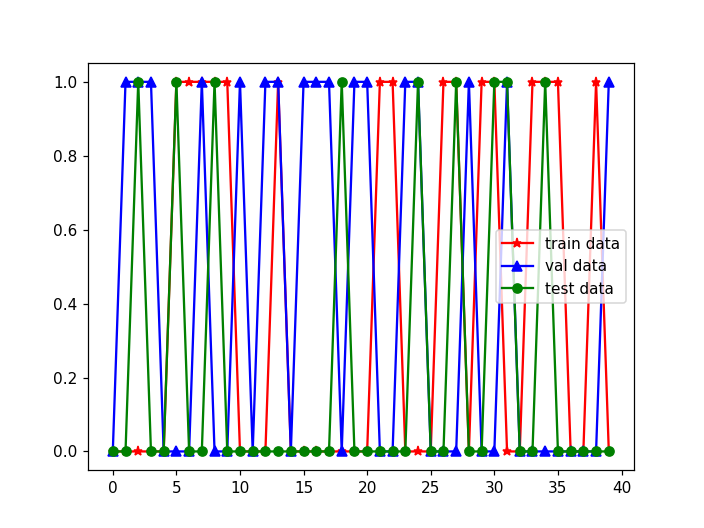

In [14]:
y_predi = knnclf.predict(Xval)
y_predi_real = knnclf.predict(Xte)

fig, ax = plt.subplots()
ax.plot(ytrain[0:40], label = "train data", color = "red", marker="*" )
ax.plot(y_predi[0:40], label = "val data", color = "blue", marker = "^")
ax.plot(y_predi_real[0:40], label = "test data", color = "green", marker= "o")
plt.legend()
plt.show()